<a href="https://colab.research.google.com/github/ovimasbul83/ovimasbul83/blob/main/deepautoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [14]:
def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image

In [15]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

In [16]:
def deep_autoencoder():
  encoder=tf.keras.layers.Dense(units=128,activation='relu')(inputs)
  encoder=tf.keras.layers.Dense(units=64,activation='relu')(encoder)
  encoder=tf.keras.layers.Dense(units=32,activation='relu')(encoder)
  decoder=tf.keras.layers.Dense(units=64,activation='relu')(encoder)
  decoder=tf.keras.layers.Dense(units=128,activation='relu')(decoder)
  decoder=tf.keras.layers.Dense(units=784,activation='sigmoid')(decoder)
  return encoder, decoder



In [17]:
inputs= tf.keras.layers.Input(shape=(784,))
deep_encoder,deep_decoder=deep_autoencoder()
encoder_model=tf.keras.Model(inputs=inputs,outputs=deep_encoder)
decoder_model=tf.keras.Model(inputs=inputs,outputs=deep_decoder)


In [18]:
train_steps = 60000 // BATCH_SIZE
decoder_model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy')
history=decoder_model.fit(train_dataset,steps_per_epoch=train_steps,epochs=50)

Epoch 1/50
468/468 [==============================] - 7s 14ms/step - loss: 0.2039
Epoch 2/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1314
Epoch 3/50
468/468 [==============================] - 4s 8ms/step - loss: 0.1166
Epoch 4/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1095
Epoch 5/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1057
Epoch 6/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1027
Epoch 7/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1002
Epoch 8/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0982
Epoch 9/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0965
Epoch 10/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0949
Epoch 11/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0934
Epoch 12/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0922
Epoch 13/50
468/468 [===

In [19]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):

  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

In [20]:
test_dataset = test_dataset.take(1)
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

In [21]:
idxs = np.random.choice(BATCH_SIZE, size=10)
print(idxs)

[96 86 58 16 96 20 66 31  9 70]


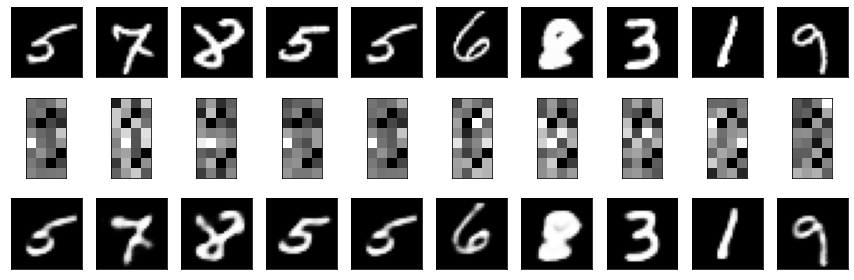

In [22]:
encoded_predicted = encoder_model.predict(test_dataset)
deep_predicted = decoder_model.predict(test_dataset)
display_results(output_samples[idxs], encoded_predicted[idxs], deep_predicted[idxs])

In [23]:
k=np.argmax([[3.314e-36]])
k

0